# STA 141A Fundamentals of Statistical Data Science

### Lecture 6, 10/17/23, Plotting in base R

### Announcements

- First midterm on Thursday! 
- No homework this week. 
- Groups due until Friday. 

### Last week's topics

- `apply` and siblings
- functions
- data frames

### Today's topics

- tidyr
- Why data vizualisation? 
- `plot` 

### `tidyr`

Tables can be easily rearranged using `tidyr`. 

In [1]:
require(tidyr)
table4a # check ?table4a

Loading required package: tidyr



country,1999,2000
<chr>,<dbl>,<dbl>
Afghanistan,745,2666
Brazil,37737,80488
China,212258,213766


In [2]:
table4a %>% 
    pivot_longer(cols = c('1999', '2000'), 
                 names_to = 'year', 
                 values_to = 'cases')

country,year,cases
<chr>,<chr>,<dbl>
Afghanistan,1999,745
Afghanistan,2000,2666
Brazil,1999,37737
Brazil,2000,80488
China,1999,212258
China,2000,213766


The opposite is achieved with `pivot_wider`: 

In [3]:
table2

country,year,type,count
<chr>,<dbl>,<chr>,<dbl>
Afghanistan,1999,cases,745
Afghanistan,1999,population,19987071
Afghanistan,2000,cases,2666
Afghanistan,2000,population,20595360
Brazil,1999,cases,37737
Brazil,1999,population,172006362
Brazil,2000,cases,80488
Brazil,2000,population,174504898
China,1999,cases,212258


In [4]:
table2 %>% pivot_wider(names_from = "type", values_from = "count")

country,year,cases,population
<chr>,<dbl>,<dbl>,<dbl>
Afghanistan,1999,745,19987071
Afghanistan,2000,2666,20595360
Brazil,1999,37737,172006362
Brazil,2000,80488,174504898
China,1999,212258,1272915272
China,2000,213766,1280428583


If the data stems from multiple sources, it has to be merged into one data frame. 

In [5]:
base = tibble(id = 1:3, 
              age = seq(55, 60, length = 3))
visits = tibble(id = c(rep(1:2, 2), 4), 
                visit = c(rep(1:2, 2), 1), 
                outcome = rnorm(5))
base
visits

id,age
<int>,<dbl>
1,55.0
2,57.5
3,60.0


id,visit,outcome
<dbl>,<dbl>,<dbl>
1,1,-0.2128860
2,2,0.3852707
1,1,0.1052648
2,2,1.3640238
4,1,-0.3085249


In [8]:
dplyr::left_join(base, visits, by = "id") # left (base) table keeps priority 

id,age,visit,outcome
<dbl>,<dbl>,<dbl>,<dbl>
1,55.0,1,-0.2128860
1,55.0,1,0.1052648
2,57.5,2,0.3852707
2,57.5,2,1.3640238
3,60.0,NA,NA


In [9]:
dplyr::right_join(base, visits, by = "id") # right (visits) table keeps 

id,age,visit,outcome
<dbl>,<dbl>,<dbl>,<dbl>
1,55.0,1,-0.2128860
1,55.0,1,0.1052648
2,57.5,2,0.3852707
2,57.5,2,1.3640238
4,NA,1,-0.3085249


In [12]:
df <- dplyr::full_join(base, visits, by = "id") # NA's are being included
df 

id,age,visit,outcome
<dbl>,<dbl>,<dbl>,<dbl>
1,55.0,1,-0.2128860
1,55.0,1,0.1052648
2,57.5,2,0.3852707
2,57.5,2,1.3640238
3,60.0,NA,NA
4,NA,1,-0.3085249


In [14]:
na.omit(df)

id,age,visit,outcome
<dbl>,<dbl>,<dbl>,<dbl>
1,55.0,1,-0.2128860
1,55.0,1,0.1052648
2,57.5,2,0.3852707
2,57.5,2,1.3640238



### Why data vizualisation? 

Consider the data set `anscombe` from the `datasets` package. Anscombe's quartet comprises four data sets that have nearly identical 
simple descriptive statistics, but they appear very different when graphed. 
Each dataset consists of eleven points given by cartesian coordinates. The dataset was constructed in 1973 by the statistician Francis Anscombe to illustrate both the importance of graphing data before analyzing it and the effect of outliers and other influential observations on statistical properties. 



In [15]:
library(datasets)
str(anscombe)

'data.frame':	11 obs. of  8 variables:
 $ x1: num  10 8 13 9 11 14 6 4 12 7 ...
 $ x2: num  10 8 13 9 11 14 6 4 12 7 ...
 $ x3: num  10 8 13 9 11 14 6 4 12 7 ...
 $ x4: num  8 8 8 8 8 8 8 19 8 8 ...
 $ y1: num  8.04 6.95 7.58 8.81 8.33 ...
 $ y2: num  9.14 8.14 8.74 8.77 9.26 8.1 6.13 3.1 9.13 7.26 ...
 $ y3: num  7.46 6.77 12.74 7.11 7.81 ...
 $ y4: num  6.58 5.76 7.71 8.84 8.47 7.04 5.25 12.5 5.56 7.91 ...


In [16]:
head(anscombe)

,x1,x2,x3,x4,y1,y2,y3,y4
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,10,10,10,8,8.04,9.14,7.46,6.58
2,8,8,8,8,6.95,8.14,6.77,5.76
3,13,13,13,8,7.58,8.74,12.74,7.71
4,9,9,9,8,8.81,8.77,7.11,8.84
5,11,11,11,8,8.33,9.26,7.81,8.47
6,14,14,14,8,9.96,8.10,8.84,7.04


Lets check summary statistics. Note that `summary` is vectorize. 

In [17]:
summary(anscombe)

       x1             x2             x3             x4           y1        
 Min.   : 4.0   Min.   : 4.0   Min.   : 4.0   Min.   : 8   Min.   : 4.260  
 1st Qu.: 6.5   1st Qu.: 6.5   1st Qu.: 6.5   1st Qu.: 8   1st Qu.: 6.315  
 Median : 9.0   Median : 9.0   Median : 9.0   Median : 8   Median : 7.580  
 Mean   : 9.0   Mean   : 9.0   Mean   : 9.0   Mean   : 9   Mean   : 7.501  
 3rd Qu.:11.5   3rd Qu.:11.5   3rd Qu.:11.5   3rd Qu.: 8   3rd Qu.: 8.570  
 Max.   :14.0   Max.   :14.0   Max.   :14.0   Max.   :19   Max.   :10.840  
       y2              y3              y4        
 Min.   :3.100   Min.   : 5.39   Min.   : 5.250  
 1st Qu.:6.695   1st Qu.: 6.25   1st Qu.: 6.170  
 Median :8.140   Median : 7.11   Median : 7.040  
 Mean   :7.501   Mean   : 7.50   Mean   : 7.501  
 3rd Qu.:8.950   3rd Qu.: 7.98   3rd Qu.: 8.190  
 Max.   :9.260   Max.   :12.74   Max.   :12.500  

Both the summary statistics for the x-coordinates and y-coordinates are very similar, respectively. As it turns out however, the data is very distinct. 

### `plot`

`plot` is a function that visualizes data. It creates a scatter plot given two vectors of x- and y-values, respectively. 

In [18]:
attach(anscombe)

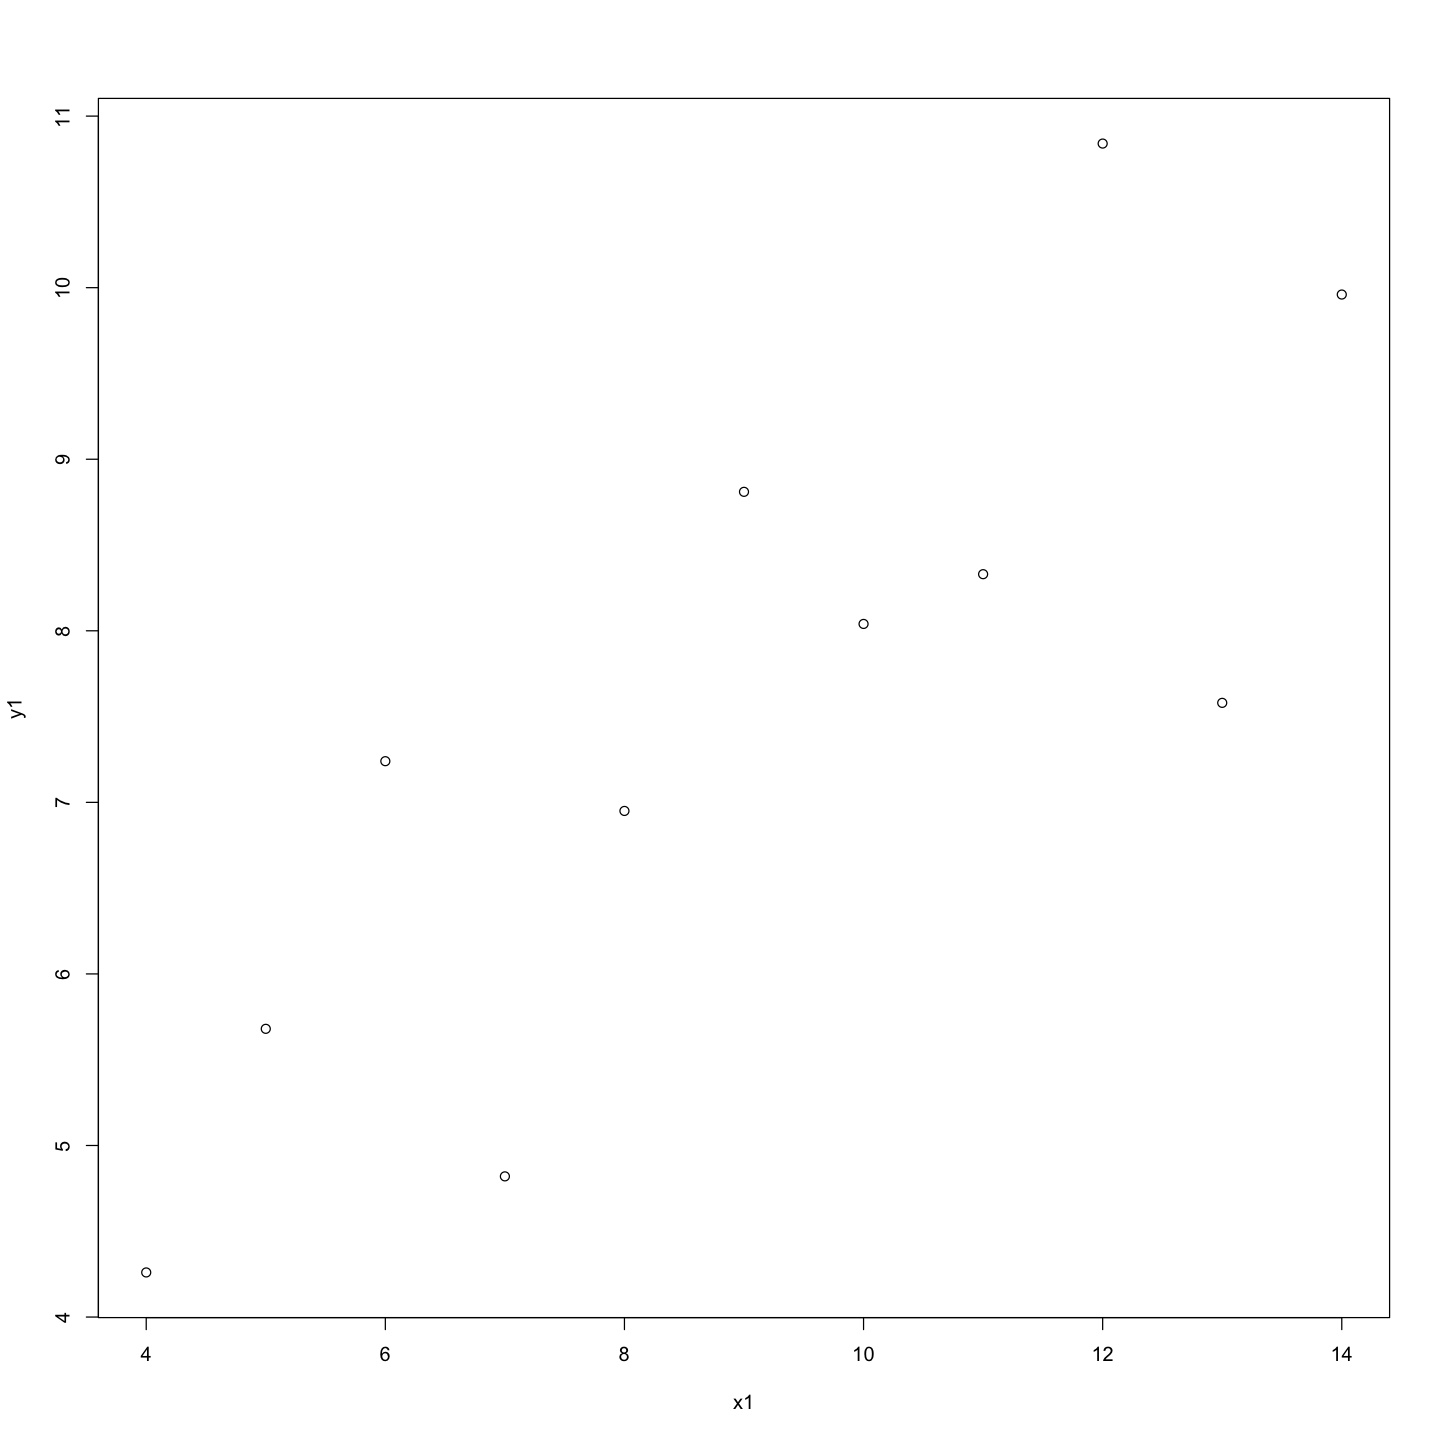

In [19]:
library(repr); options(repr.plot.width = 12, repr.plot.height = 12) # only necessary for jupyter, not R Studio
plot(x1, y1)

Since we want to include the other data into the same window, we use the function `points`. 

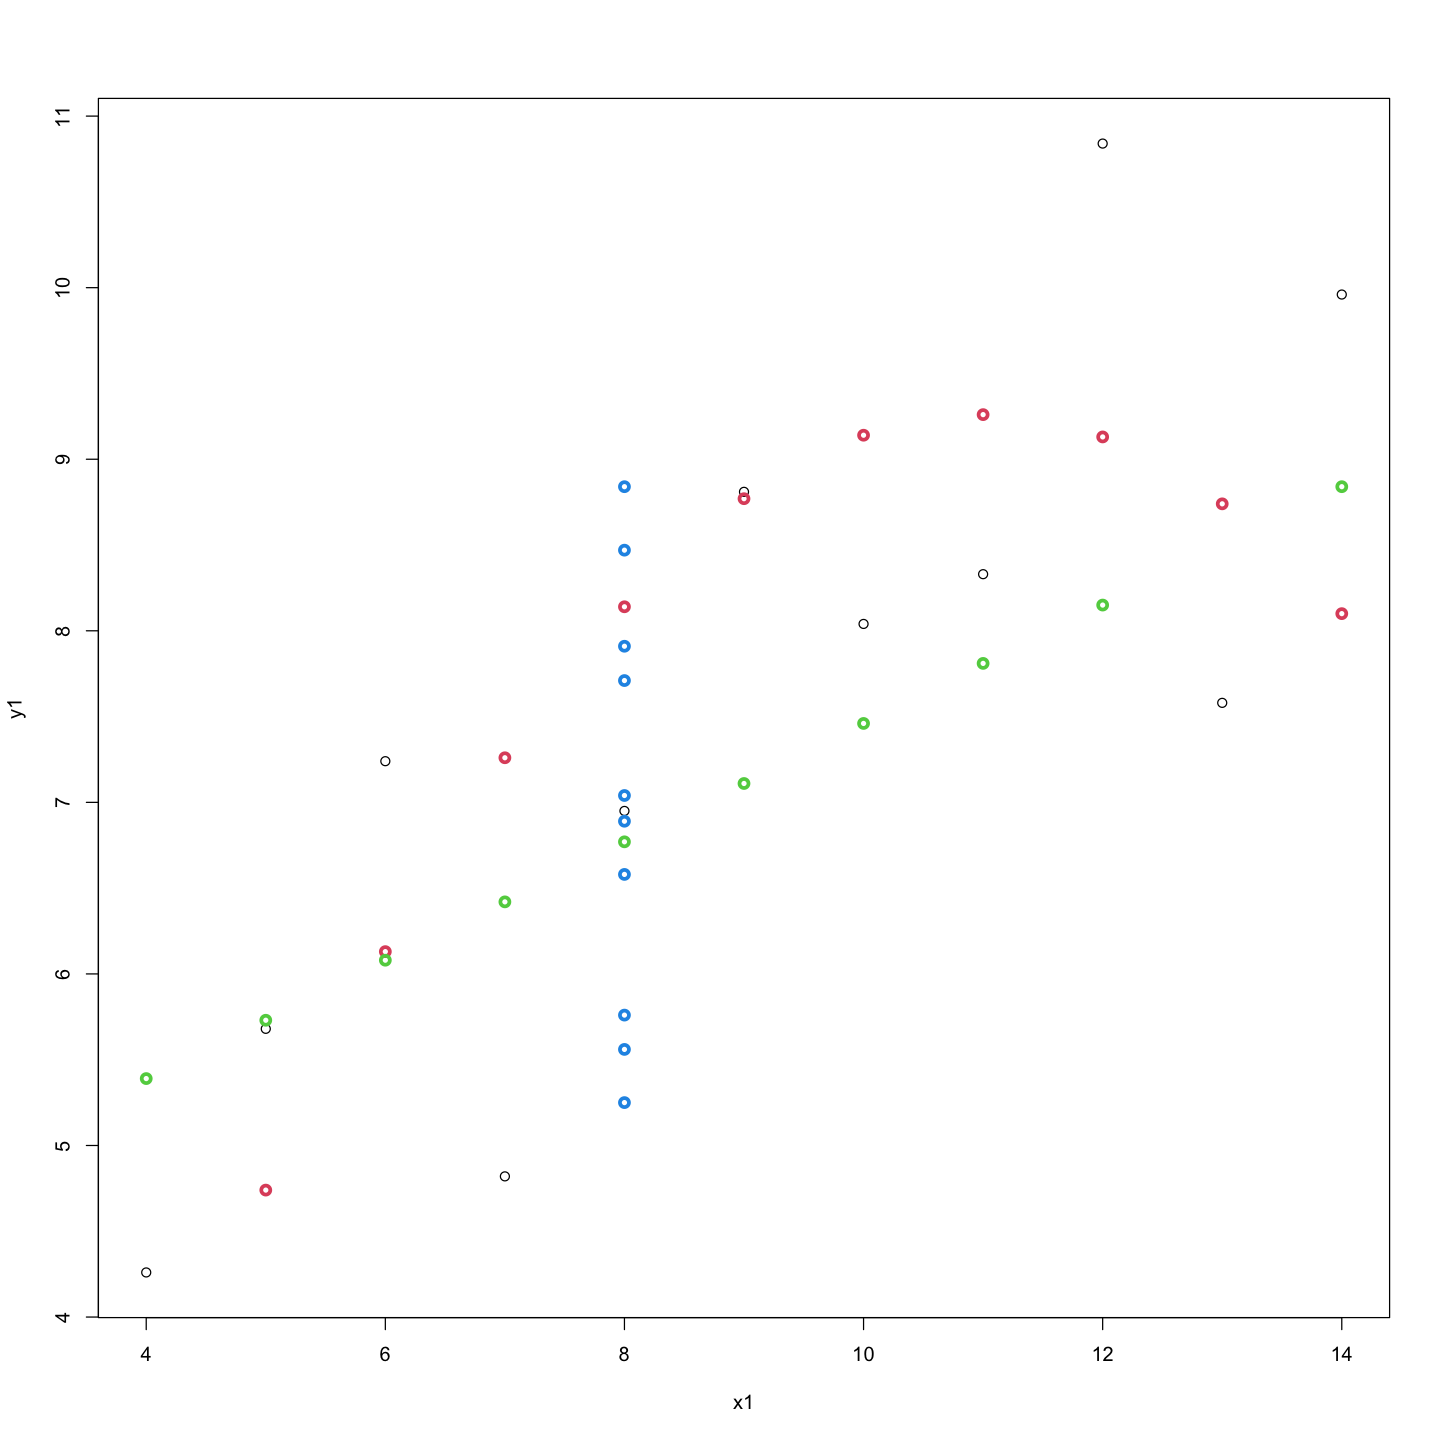

In [20]:
plot(x1, y1) # default color is black 
points(x2, y2, col = 2, lwd = 3) # color is red 
points(x3, y3, col = 3, lwd = 3) # color is green 
points(x4, y4, col = 4, lwd = 3) # color is blue

This plot is too small and cramped to interpred. We get a better visualization by splitting the pane. 

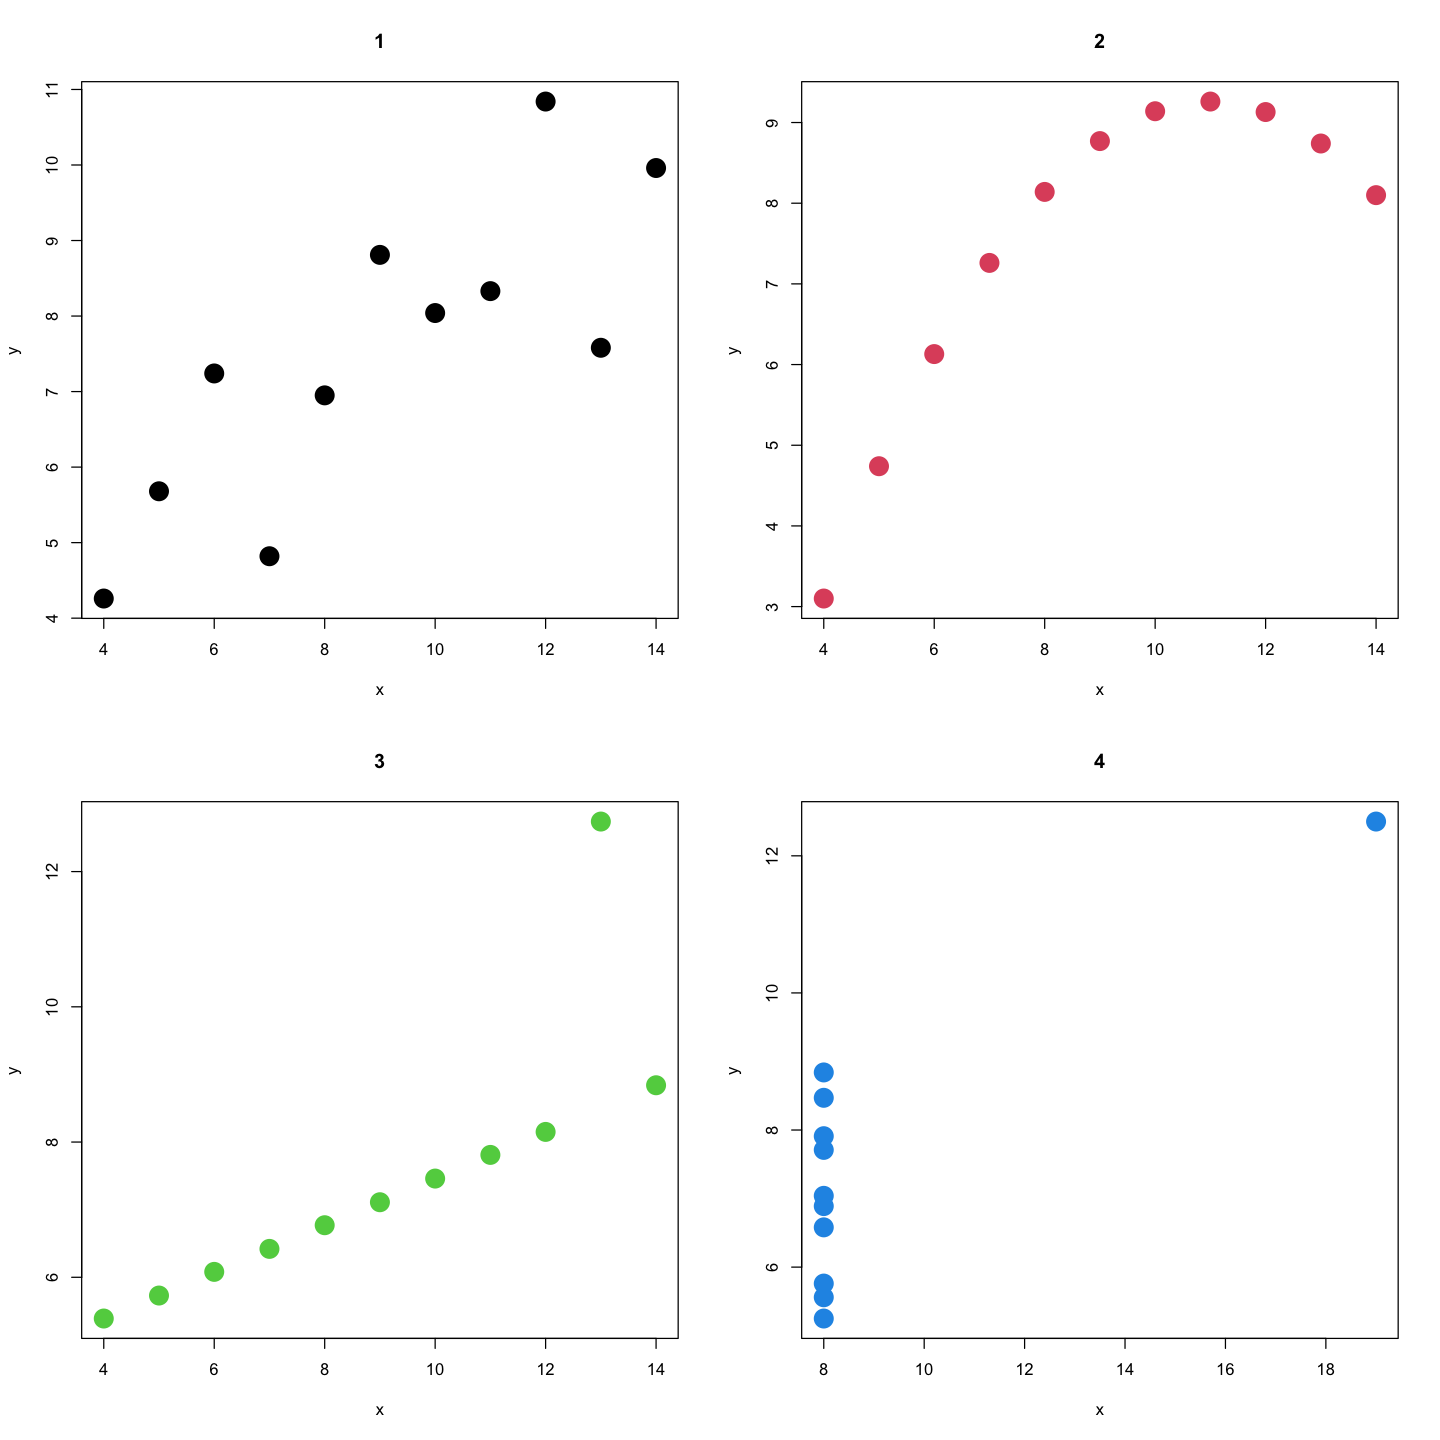

In [21]:
#library(repr); options(repr.plot.width = 12, repr.plot.height = 13) # only necessary for jupyter, not R Studio
par(mfrow = c(2, 2))
plot(x1, y1, xlab = "x", ylab = 'y', col = 1, lwd = 10, pch = 19, main = "1")
plot(x2, y2, xlab = "x", ylab = 'y', col = 2, lwd = 10, pch = 19, main = "2")
plot(x3, y3, xlab = "x", ylab = 'y', col = 3, lwd = 10, pch = 19, main = "3")
plot(x4, y4, xlab = "x", ylab = 'y', col = 4, lwd = 10, pch = 19, main = "4")

Note that after using `par`, the layout has to be re-set to its original state. 

In [22]:
par(mfrow = c(1, 1))

In [23]:
detach(anscombe)

Obviously, the data sets are very different, a notion that could not be detected by inspecting solely the summary statistics. In consequence, visualizing the data is standard practice. 

Base R offers a variety of other visualization methods. 

In [26]:
require(dplyr)
set.seed(123)

In [27]:
df <- data.frame(matrix(rnorm(200, 0, 1), nc = 2) %*% matrix(c(1,0.5, 0.5, 1), 2, 2))
df <- df %>% mutate(X3 = sort(rt(100, 10)), 
                    X4 = sin(X3))

In [28]:
head(df)

,X1,X2,X3,X4
,<dbl>,<dbl>,<dbl>,<dbl>
1,-0.9156789,-0.9906444,-3.988309,0.74910903
2,-0.1017356,0.1417950,-3.188289,0.04667953
3,1.4353624,0.5326623,-2.341395,-0.71749348
4,-0.1032629,-0.3122884,-2.335779,-0.72139415
5,-0.3465215,-0.8869747,-2.120815,-0.85251454
6,1.6925511,0.8125048,-2.022130,-0.89986618


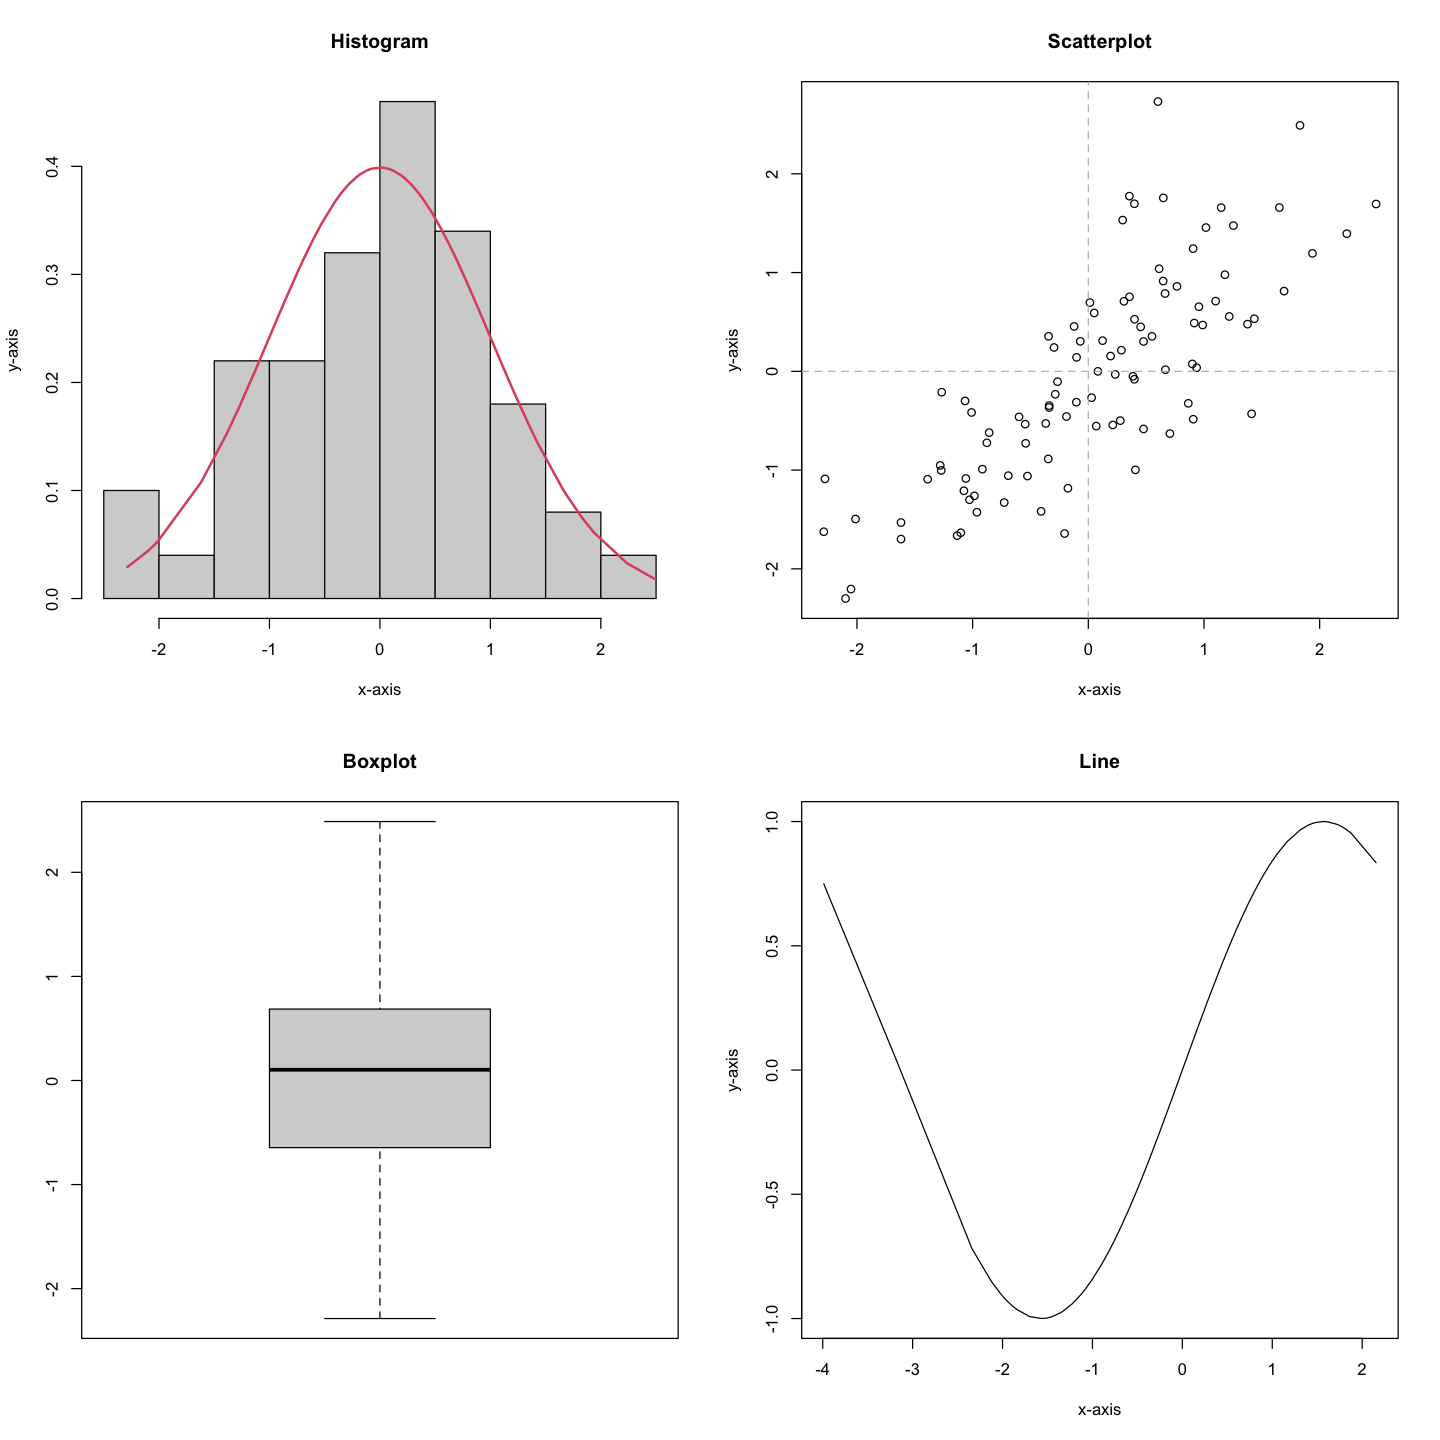

In [30]:
attach(df)
par(mfrow = c(2, 2))
hist(X1, xlab = "x-axis", ylab = "y-axis", main = "Histogram", freq = F, breaks = 10)
lines(sort(X1), dnorm(sort(X1)), col = 2, lwd = 2)
plot(X1, X2, xlab = "x-axis", ylab = "y-axis", main = "Scatterplot")
abline(h = 0, lty = "dashed", col = "grey")
abline(v = 0, lty = "dashed", col = "grey")
boxplot(X1, main = "Boxplot")
plot(X3, X4, type = "l", xlab = "x-axis", ylab = "y-axis", main = "Line")

par(mfrow = c(1, 1))
detach(df)

### Exercise

i) Set the seed to `set.seed(123)`. Generate a sample of size $100$ from the $Beta(\alpha, \beta)$-distribution with $\alpha = 2$ and $\beta = 5$. Plot a histogram of the sample with $20$ breaks between zero and one. Force the histogram to to plot the values on a y-axis from zero to four with the argument `ylim`. Use the function `paste0` to add the sample size dynamically to the plot title. 
Add the theoretical density with red color and a dashed vertical line at the mode at $\frac{\alpha-1}{\alpha + \beta -2}$. 

Does the theoretical mode coincide with the histogram? Repeat above procedure with a sample of size $1000$. Arrange both plots on top of each other. 

ii) Obtain the `faithful` data set from the `datasets` package. Plot `eruptions` against `waiting` and split the data frame by the resulting clusters. Now, plot the data in which both clusters are colored differently with red and blue and displayed with triangles and crosses instead of circles. 
Set adequate axis labels and name the plot "Old Faithful". Help: You may want to use the arguments `ylim` and `xlim`. 

iii) Create three plots in one graphic that show a) the `pch` arguments `0:25`, `col` arguments `0:16` and `lty` arguments `0:6`.  